In [138]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import *
import scipy.stats as sts
import statistics
from scipy import integrate

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

#### Задание 1:    
Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

<function matplotlib.pyplot.show(close=None, block=None)>

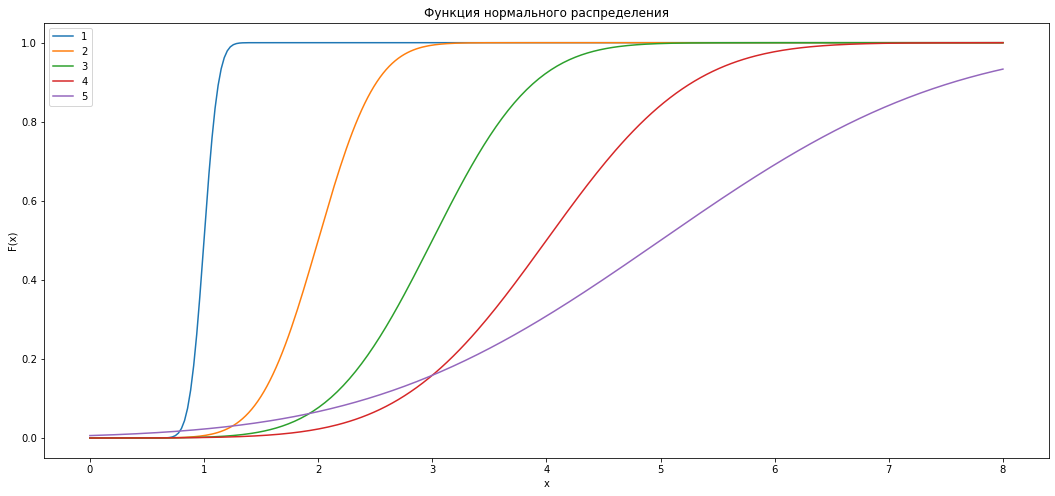

In [139]:
# Нормальное распределение
ms = {1:0.1, 2:0.4, 3:0.7, 4:1, 5:2}
for m, s in ms.items():
    rv = sts.norm(loc = m, scale = s)
    x = np.linspace(0,8,300)
    plt.plot(x, rv.cdf(x), label = m)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Функция нормального распределения')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

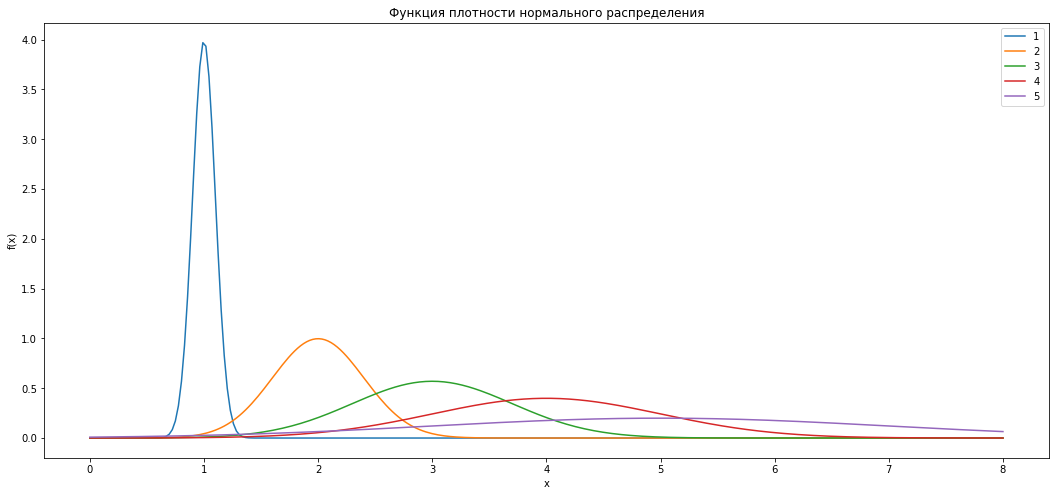

In [140]:
ms = {1:0.1, 2:0.4, 3:0.7, 4:1, 5:2}
for m, s in ms.items():
    rv = sts.norm(loc = m, scale = s)
    x = np.linspace(0,8,300)
    plt.plot(x, rv.pdf(x), label = m)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Функция плотности нормального распределения')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

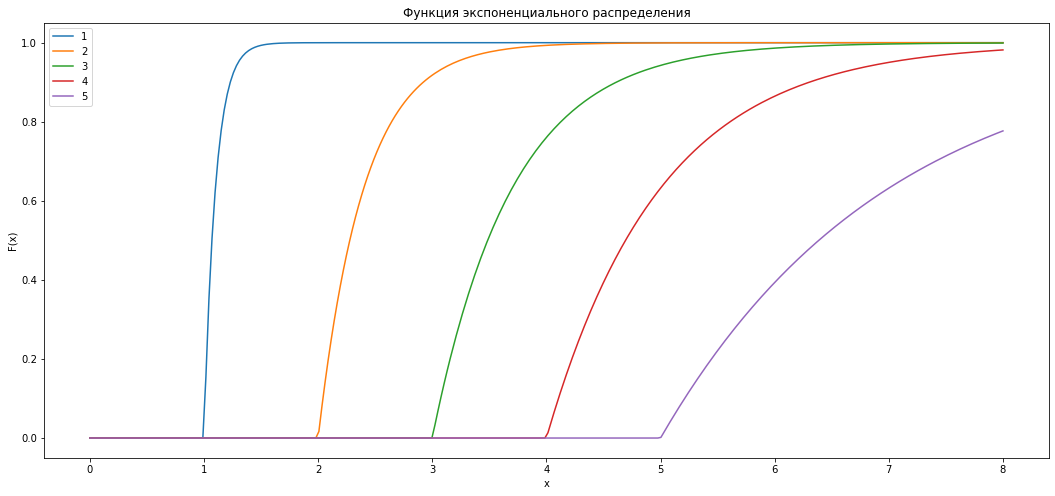

In [141]:
# Экспоненциальное распределение
ms = {1:0.1, 2:0.4, 3:0.7, 4:1, 5:2}
for m, s in ms.items():
    rv = sts.expon(loc = m, scale = s)
    x = np.linspace(0,8,300)
    plt.plot(x, rv.cdf(x), label = m)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Функция экспоненциального распределения')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

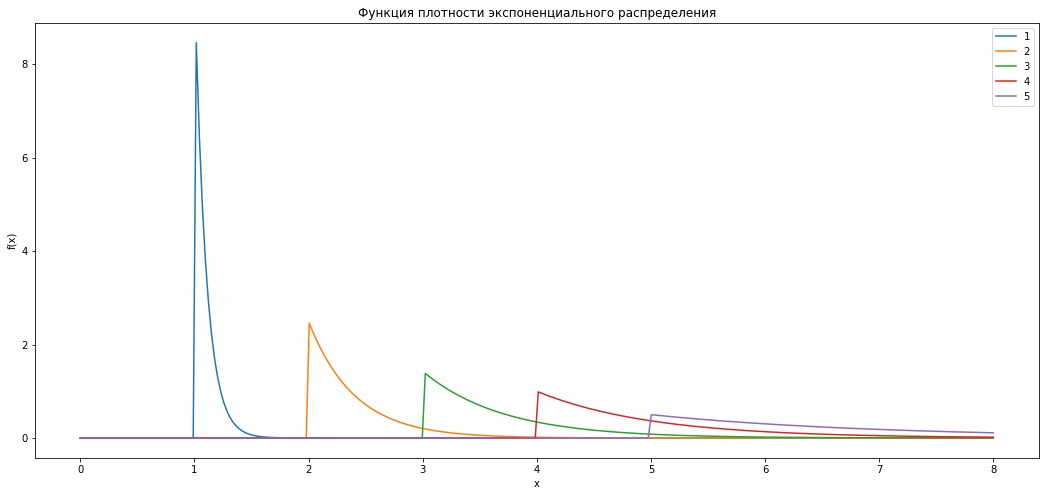

In [142]:
ms = {1:0.1, 2:0.4, 3:0.7, 4:1, 5:2}
for m, s in ms.items():
    rv = sts.expon(loc = m, scale = s)
    x = np.linspace(0,8,300)
    plt.plot(x, rv.pdf(x), label = m)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Функция плотности экспоненциального распределения')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

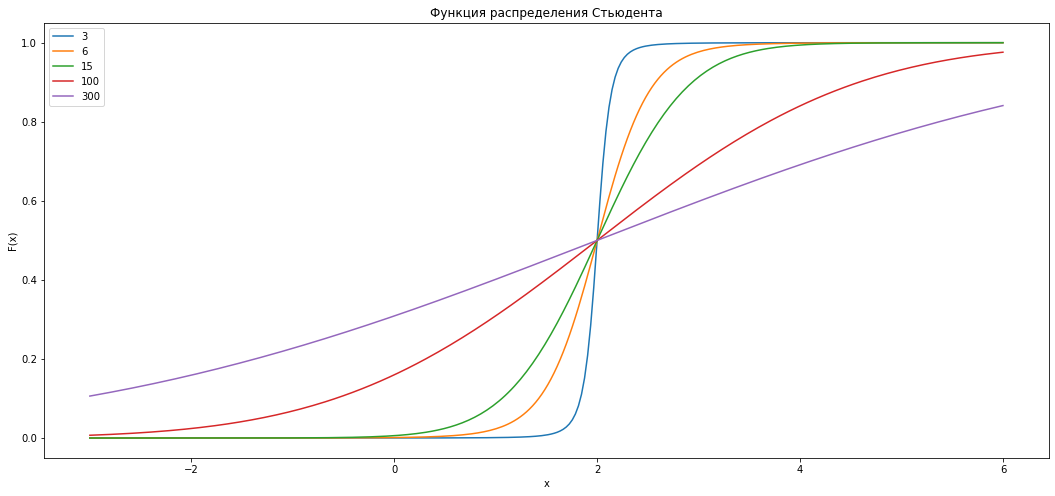

In [143]:
# Распределение Стьюдента
dfs = {3:0.1, 6:0.4, 15:0.7, 100:2, 300:4}
for df, s in dfs.items():
    rv = sts.t(df, loc = 2, scale = s)
    x = np.linspace(-3,6,300)
    plt.plot(x, rv.cdf(x), label = df)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Функция распределения Стьюдента')
plt.legend()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

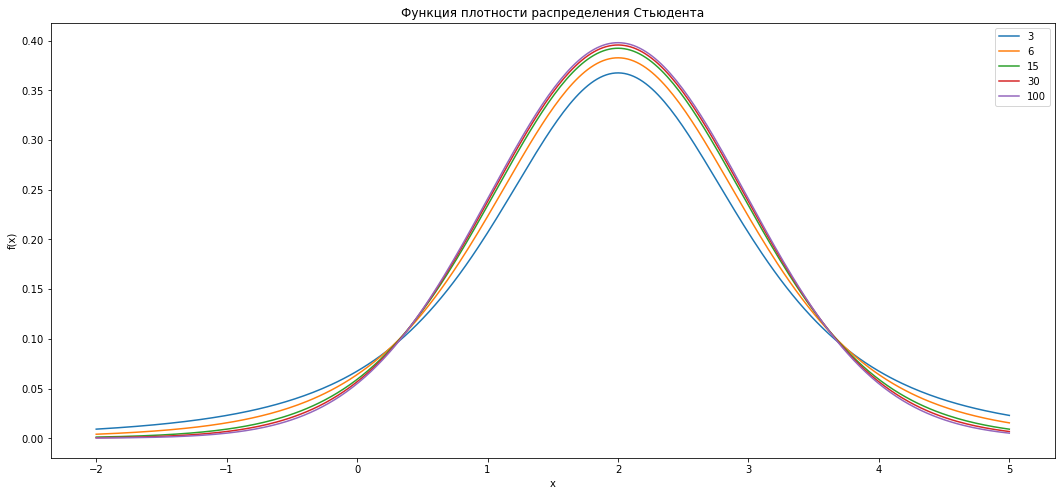

In [144]:
dfs = {3:0.1, 6:0.4, 15:0.7, 30:2, 100:4}
for df, s in dfs.items():
    rv = sts.t(df, loc = 2) # можно добавить параметр scale = s, тогда будет наблюдаться амплитуда изменений плотности больше
    x = np.linspace(-2,5,300)
    plt.plot(x, rv.pdf(x), label = df)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Функция плотности распределения Стьюдента')
plt.legend()
plt.show

#### Задание 2
Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания в отрезок $[3.5;7]$, т.е. P(3.5 < $\xi$ < 7).

С = 0.2, мат ожидание M𝜉 = 2.5. вероятность попадания в отрезок  [3.5;7], т.е. P(3.5 < 𝜉 < 7): 0.30000000000000004


<function matplotlib.pyplot.show(close=None, block=None)>

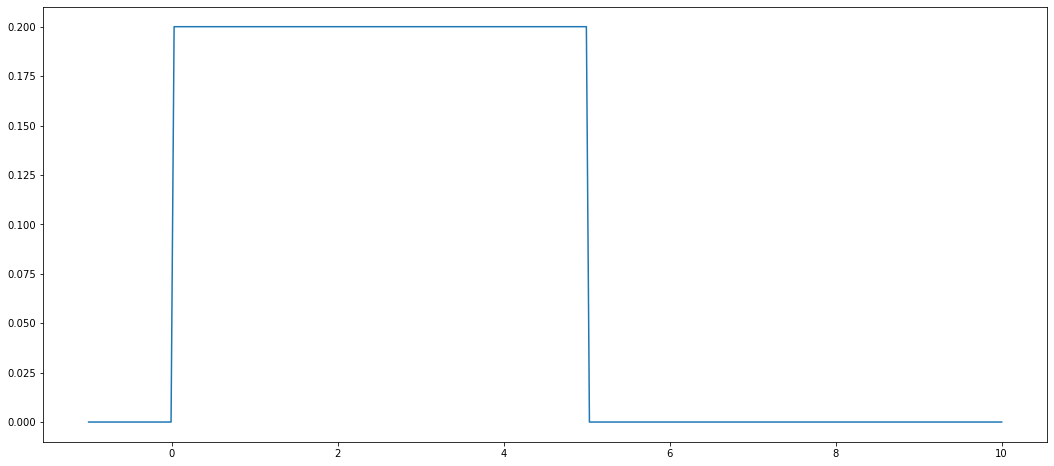

In [180]:
a = 0
b = 5
C = 1/(b - a)
M𝜉 = (a + b)/2 # мат ожидание
v = integrate.quad(lambda x: C, 3.5, 5) + integrate.quad(lambda x:0, 5, 7) # Рассчет P(3.5 < 𝜉 < 7)
print(f'С = {C}, мат ожидание M𝜉 = {M𝜉}. вероятность попадания в отрезок  [3.5;7], т.е. P(3.5 < 𝜉 < 7): {v[0]}')

loc =  a 
scale =  b - a
rv = sts.uniform(loc = loc, scale = scale)
x = np.linspace(-1,10,300)
plt.plot(x, rv.pdf(x))
plt.show

#### Задание 3
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [179]:
# поскольку в первом варианте включение какого либо цвета несет в себе разную вероятность события,
# то необзодимо использовать фомулу Шеннона
t1, t2, t3 = [54, 4, 28]
t = t1 + t2 + t3
p1 = t1/t # вероятность, что загорится красный
p2 = t2/t # вероятность, что загорится желтый
p3 = t3/t # вероятность, что загорится зеленый
I = p1*math.log2(1/p1) + p2*math.log2(1/p2) + p3*math.log2(1/p3)
print(f'Сообщение о цвете светофора в текущий момент несет {I} бит')

# А что будет в случае 28, 28 и 28 секунд для каждого цвета?
# Т.к. включение любого цвета светофора несет в себе одинаковую вероятность, то использую формулу Хартли
t1, t2, t3 = [28, 28, 28]
t = t1 + t2 + t3
p1 = t1/t # вероятность, что загорится красный, и она будет совпадать с вероятностью желтого и зеленого.
I = math.log2(1/p1)
print(f'Сообщение о цвете светофора в текущий момент несет {I} бит')
  

Сообщение о цвете светофора в текущий момент несет 1.154522162441165 бит
Сообщение о цвете светофора в текущий момент несет 1.584962500721156 бит
